In [2]:
"""=============================================================================
Ex6: Gradient Descent - SAT
    Case study: "SAT and College GPA" của 105 SV vào học chuyên ngành CS
                ở một trường công lập địa phương. 
                Chúng ta cần dự đoán university GPA nếu biết high school GPA.
        1) Đọc dữ liệu trên vào dataframe
        2) Trực quan hóa dữ liệu theo high school GPA, university GPA
           Ta có: x = high school GPA (định dạng chuẩn), y = university GPA
        3) Với phương trình: y = mx + b (univ_GPA = (m * high_GPA) + b) 
            gọi hàm tính m, b: theta = gradient_descent_2(alpha, x, y, 1000)
        4) Từ m, b (m = theta[1], b = theta[0]), dự đoán univ_GPA theo m, b
        5) Trực quan hóa dữ liệu
        6) Dự đoán univ_GPA lần lượt với high_GPA là 2.3, 2.8, 3.3, 3.8   
============================================================================="""
print()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sbn
from sklearn import linear_model

In [4]:
print('=============================================================')
print('*** 1) Read data sat.xlsx into dataframe***')
print('=============================================================')
print()

sat = pd.read_excel('data_Buoi6/sat.xls')
print('SAT data frame:\n',sat)

#high_GPA = highschool GPA
#univ_GPA = university GPA

*** 1) Read data sat.xlsx into dataframe***

SAT data frame:
      high_GPA  math_SAT  verb_SAT  comp_GPA  univ_GPA
0        3.45       643       589      3.76      3.52
1        2.78       558       512      2.87      2.91
2        2.52       583       503      2.54      2.40
3        3.67       685       602      3.83      3.47
4        3.24       592       538      3.29      3.47
..        ...       ...       ...       ...       ...
100      3.76       605       590      3.74      3.64
101      3.49       692       683      3.27      3.42
102      3.07       680       692      3.19      3.25
103      2.19       617       503      2.98      2.76
104      3.46       516       528      3.28      3.41

[105 rows x 5 columns]


*** 2) Visualize high_GPA and univ_GPA***



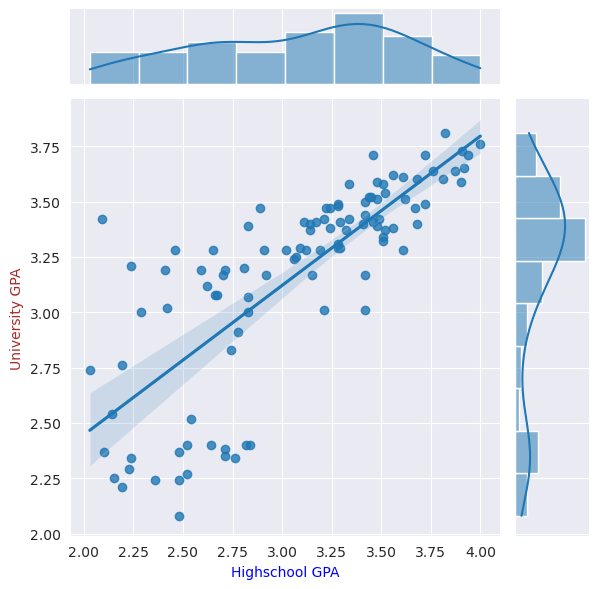

In [5]:
print('=============================================================')
print('*** 2) Visualize high_GPA and univ_GPA***')
print('=============================================================')
print()

sbn.set_style('darkgrid')
sbn.jointplot(x=sat.high_GPA, y=sat.univ_GPA, kind='reg')
plt.xlabel('Highschool GPA', color='blue')
plt.ylabel('University GPA', color='brown')
plt.show()

In [10]:
print('=============================================================')
print('*** 3) Calculate theta[0] = bias and theta[1] = slope***')
print('=============================================================')
print()

y = sat.univ_GPA
x = sat.high_GPA
x_1 = np.c_[np.ones(x.shape),x]

#-------------Use gradient_descent_XY.py module------------#
print('---------Method 1: Use gradient_descent_XY.py module-------------')
from gradient_descent_XY import gradient_descent_linearXY

bias, slope = gradient_descent_linearXY(x,y)

print('\n---------Method 2: use Pseudo Inverse matrix-------------')
from numpy.linalg import pinv
theta = pinv(x_1.T @ x_1) @ (x_1.T) @ y
print(f'Theta [bias, slope] = pinv(x_1.T @ x_1) @ (x_1.T) @ y = {theta}')

print('\n---------Method 3: use sklearn.linear_model.LinearRegression-------------')
from sklearn.linear_model import LinearRegression

regr_object = LinearRegression(fit_intercept=False) #fit_intercept=False to calculate bias
regr_object.fit(x_1,y)
print('[Bias, Slope] =',regr_object.coef_)

*** 3) Calculate theta[0] = bias and theta[1] = slope***

---------Method 1: Use gradient_descent_XY.py module-------------
Theta vector = [b m]

The y_hypothesis = x_1.dot(theta) (first 5 lines):
y_hypo_1 = 1.0*b + 3.45*m
y_hypo_2 = 1.0*b + 2.78*m
y_hypo_3 = 1.0*b + 2.52*m
y_hypo_4 = 1.0*b + 3.67*m
y_hypo_5 = 1.0*b + 3.24*m

Differentiation of loss(m,b) respect to m = 646.04*b + 2042.9748*m - 2087.2522

Differentiation of loss(m,b) respect to b = 210.0*b + 646.04*m - 666.3

After 87614 loops, theta[bias,slope] = [1.0968232817935106, 0.6748299034477172]

---------Method 2: use Pseudo Inverse matrix-------------
Theta [bias, slope] = pinv(x_1.T @ x_1) @ (x_1.T) @ y = [1.09682328 0.6748299 ]

---------Method 3: use sklearn.linear_model.LinearRegression-------------
[Bias, Slope] = [1.09682328 0.6748299 ]


In [12]:
print('=============================================================')
print('*** 4) Y_predict (univ_GPA_predict) from slope and bias***')
print('=============================================================')
print()

y_predict_1 = np.array(x*slope + bias)
print('Y_predict_1 calculated with module =\n', y_predict_1)

y_predict_2 = np.array(x*theta[1] + theta[0])
print('\nY_predict_1 calculated with pinv() =\n', y_predict_2)

*** 4) Y_predict (univ_GPA_predict) from slope and bias***

Y_predict_1 calculated with module =
 [3.42498645 2.97285041 2.79739464 3.57344903 3.28327217 2.51396608
 2.99984361 2.68942185 2.72991165 3.46547624 3.44523135 2.54095928
 2.84463273 3.43173475 3.46547624 3.58019733 3.7354082  3.60719052
 2.54770757 2.77040144 3.18204768 2.92561232 2.75690484 3.33725856
 3.53295923 3.67467351 2.87837423 2.57470077 3.35075516 3.44523135
 3.49921774 3.66792521 3.7421565  3.7961429  2.79739464 2.92561232
 3.22253748 3.26977557 2.64218376 2.46672799 3.21578918 3.47222454
 3.0605783  3.00659191 2.88512253 2.72316335 2.81089124 2.89187082
 3.26302727 3.35075516 3.58019733 3.01334021 2.94585722 2.92561232
 2.60844227 2.77040144 3.21578918 3.00659191 3.41823815 3.0470817
 2.89861912 3.28327217 3.31701366 3.70841501 3.7556531  3.40474155
 3.47222454 2.60844227 3.31701366 3.39799325 3.49921774 3.53295923
 3.31026537 3.26302727 3.44523135 3.53970753 3.0673266  2.99309531
 3.19554428 3.31026537 2.9188640

*** 5) Visualize real Y, Y_predict_1 and Y_predict_2***



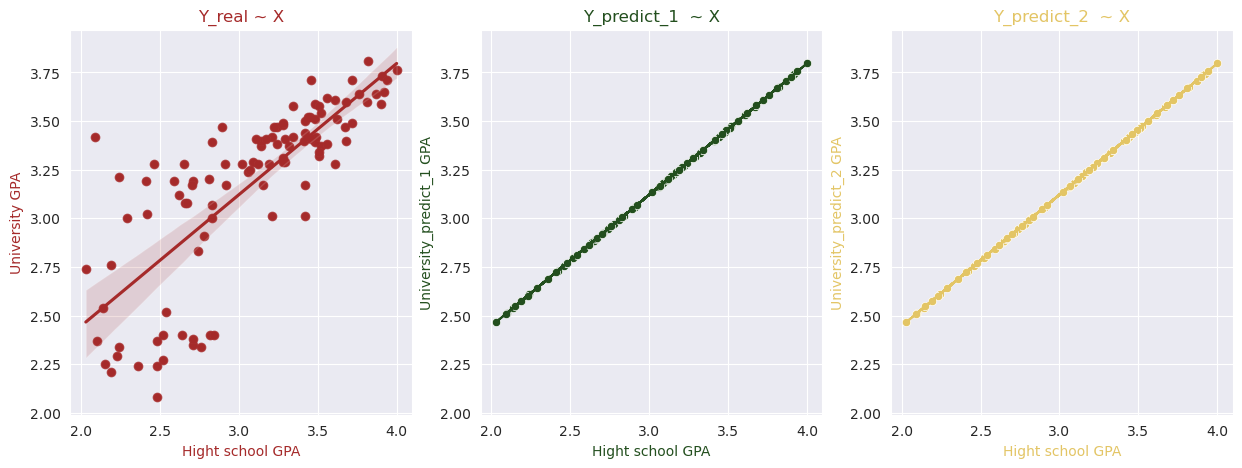

In [14]:
print('=============================================================')
print('*** 5) Visualize real Y, Y_predict_1 and Y_predict_2***')
print('=============================================================')
print()

fig =plt.figure(figsize=(15,5))
sbn.set_style('darkgrid')
grsp = GridSpec(nrows=1, ncols=3)

Y_real_fig = fig.add_subplot(grsp[0,0])
sbn.scatterplot(x=x,y=y, color='brown')
sbn.regplot(x=x, y=y, color='brown')
Y_real_fig.set_xlabel('Hight school GPA',color='brown')
Y_real_fig.set_ylabel('University GPA', color='brown')
Y_real_fig.set_title('Y_real ~ X',color='brown')

Y_predict1_fig = fig.add_subplot(grsp[0,1], sharey=Y_real_fig)
sbn.scatterplot(x=x,y=y_predict_1, color='#234F1E')
plt.plot(x, y_predict_1, color='#234F1E')
Y_predict1_fig.set_xlabel('Hight school GPA',color='#234F1E')
Y_predict1_fig.set_ylabel('University_predict_1 GPA', color='#234F1E')
Y_predict1_fig.set_title('Y_predict_1  ~ X',color='#234F1E')

Y_predict2_fig = fig.add_subplot(grsp[0,2],sharey=Y_real_fig)
sbn.scatterplot(x=x,y=y_predict_2, color='#E3C565')
plt.plot(x, y_predict_2, color='#E3C565')
Y_predict2_fig.set_xlabel('Hight school GPA',color='#E3C565')
Y_predict2_fig.set_ylabel('University_predict_2 GPA', color='#E3C565')
Y_predict2_fig.set_title('Y_predict_2  ~ X',color='#E3C565')

plt.show()

In [20]:
print('=============================================================')
print('*** 6) predict univ_GPA where high_GPA = 2.3, 2.8, 3.3, 3.8***')
print('=============================================================')
print()

for i in [2.3, 2.8, 3.3, 3.8]:
    print(f'With high_GPA = {i}, the univ_GPA will be {i*theta[1] + theta[0]}')

*** 6) predict univ_GPA where high_GPA = 2.3, 2.8, 3.3, 3.8***

With high_GPA = 2.3, the univ_GPA will be 2.6489320597232746
With high_GPA = 2.8, the univ_GPA will be 2.9863470114471378
With high_GPA = 3.3, the univ_GPA will be 3.323761963171001
With high_GPA = 3.8, the univ_GPA will be 3.661176914894864
